<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_11_mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum_11/Data/katalog_gempa.csv')
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


In [57]:
df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,92887.000000,92887.000000,92887.000000,92887.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,-3.404577,119.159707,49.009399,3.592788,170.142852,60.202121,30.358062,197.450303,56.576344,35.250018
std,4.354584,10.833202,76.761070,0.834042,88.359267,19.699252,99.957906,118.920519,21.274923,98.235894
min,-11.000000,94.020000,2.000000,1.000000,0.000000,2.300000,-180.000000,0.000000,1.500000,-180.000000
25%,-7.885000,113.170000,10.000000,3.000000,107.550000,46.950000,-28.500000,63.115000,39.400000,-19.900000
50%,-2.910000,121.160000,16.000000,3.500000,144.600000,62.300000,57.600000,240.720000,58.400000,56.500000
75%,0.140000,126.900000,54.000000,4.200000,217.500000,76.400000,100.150000,297.480000,74.700000,112.600000
max,6.000000,142.000000,750.000000,7.900000,359.200000,90.000000,180.000000,359.980000,90.000000,180.000000


In [58]:
df.isnull().sum()

,0
tgl,0
ot,0
lat,0
lon,0
depth,0
mag,0
remark,0
strike1,90152
dip1,90152
rake1,90152


In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df_cluster = df[['lat', 'lon', 'depth', 'mag']]

In [61]:
X = df_cluster.values

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df_cluster.columns)
df_scaled.head()

,lat,lon,depth,mag
0,-1.326293,-0.009204,-0.508195,1.567330
1,-0.722328,0.967429,-0.508195,1.207634
2,-0.827965,-1.156609,0.937858,0.128546
3,0.024016,0.802195,-0.508195,-0.470948
4,-0.690178,0.958198,0.273455,0.847938


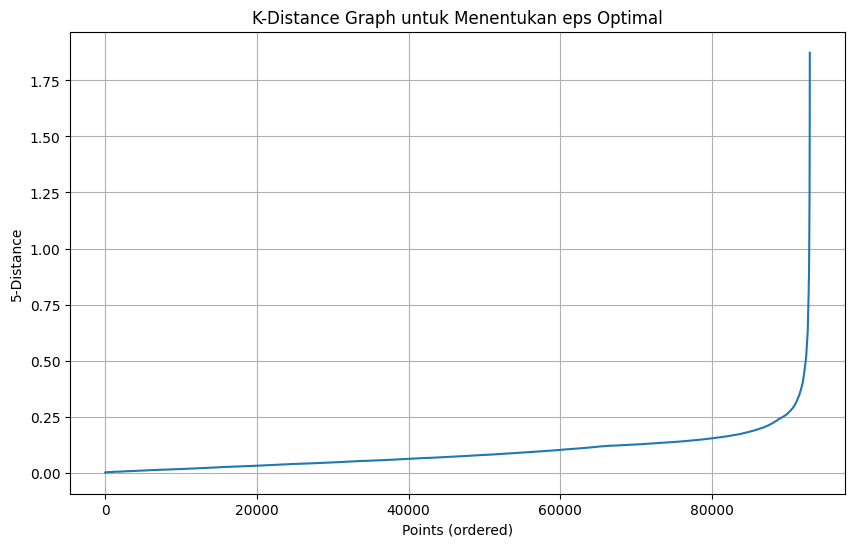

In [62]:
k = 5
# Hitung jarak ke tetangga ke-k
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title("K-Distance Graph untuk Menentukan eps Optimal")
plt.ylabel(f"{k}-Distance")
plt.xlabel("Points (ordered)")
plt.grid(True)
plt.show()

In [ ]:
# Inisialisasi model DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)

# Lakukan clustering
labels = dbscan.fit_predict(X_scaled)

# Tambahkan hasil cluster kembali ke DataFrame asli
df_cluster['Cluster_DBSCAN'] = labels

# Hitung jumlah titik di setiap cluster
print("Distribusi hasil clustering DBSCAN:")
print(df_cluster['Cluster_DBSCAN'].value_counts())

In [ ]:
# Filter data: Hilangkan data noise (label -1)
mask = labels != -1

# Dapatkan label unik dari data non-noise
unique_labels_non_noise = np.unique(labels[mask])

# Memastikan ada lebih dari 1 cluster non-noise untuk menghitung Silhouette Score
if len(unique_labels_non_noise) > 1:
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"Silhouette Score (di luar noise): {score:.4f}")
else:
    print("Tidak cukup cluster (setelah menghilangkan noise) untuk menghitung Silhouette Score. Diperlukan minimal 2 cluster.")


In [ ]:
# Kurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
df_pca = pd.DataFrame(reduced, columns=['PCA 1', 'PCA 2'])
df_pca['Cluster'] = labels.astype(str) # Ubah ke string agar lebih mudah di-plot

# Visualisasi Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', data=df_pca, palette='Set1', alpha=0.6)
plt.title("Visualisasi Cluster DBSCAN Gempa (PCA 2D)")
plt.show()

In [ ]:
# Contoh Kerangka Kode untuk Visualisasi Peta (Memerlukan Folium)


# Buat peta dasar (misalnya di tengah Indonesia)
map_gempa = folium.Map(location=[-2.5, 118.0], zoom_start=5)

# Tentukan warna untuk setiap cluster
def color_producer(cluster):
    if cluster == 0:
        return 'red'   # Cluster Mayoritas
    elif cluster == -1:
        return 'blue'  # Noise/Outlier
    else:
        return 'green' # Cluster kecil lainnya (jika ada)

# Tambahkan setiap titik gempa ke peta
for index, row in df_cluster.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=1,
        color=color_producer(row['Cluster_DBSCAN']),
        fill=True,
        fill_color=color_producer(row['Cluster_DBSCAN']),
        fill_opacity=0.6,
        tooltip=f"Mag: {row['mag']}, Depth: {row['depth']}, Cluster: {row['Cluster_DBSCAN']}"
    ).add_to(map_gempa)

map_gempa # Tampilkan peta interaktif
